<a href="https://colab.research.google.com/github/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/blob/main/Class%20Material/mushroom_Edit_by_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de Cogumelos

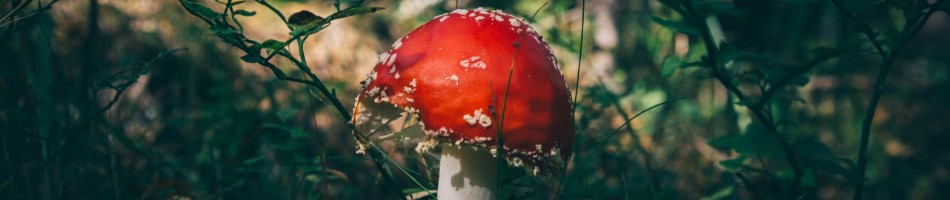

Nessa aula revemos um pouco mais da análise exploratória, e vamos iniciar os conceitos de classificação fazendo uma árvore de decisão.

A base de dados que será utilizada nessa aula pode ser encontrada no Kaggle pelo seguinte link : https://www.kaggle.com/datasets/uciml/mushroom-classification 



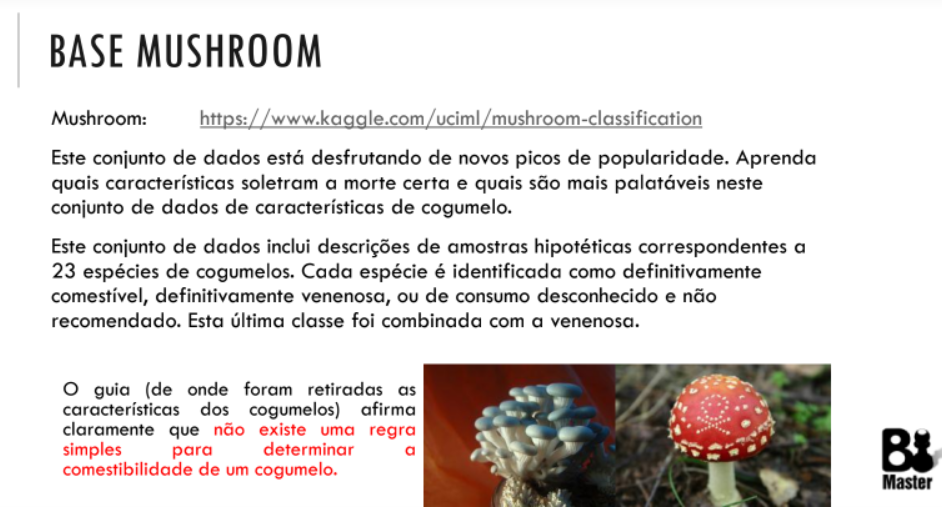

Essa aula foi ministrada pela professora Manoela Kohler (https://www.linkedin.com/in/manoelakohler/) no curso BI Master (http://www.ica.ele.puc-rio.br/en/bi-master/) na matéria de Data Mining [DM] (http://www.ica.ele.puc-rio.br/programa-bi-master/).

## Carregar base de Dados

❗❗❗❗❗❗
DICA
❗❗❗❗❗

Para conseguir utilizar a base de dados sem precisar baixar toda vez que quiser rodar o código, ou salva-lá no drive, podemos utilizar a base dentro do github.

Para isso, basta subirmos um arquivo .csv para o github, em seguida abrir esse arquivo e clicar em "Raw" e copiar o link da página que será aberta. Para carregar o mesmo, basta fazer o read_csv passando o link copiado.

In [ ]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/main/Class%20Material/dataset/mushrooms.csv', sep=';')
data.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
0,BELL,SCALY,BUFF,BRUISES,NONE,FREE,CLOSE,BROAD,WHITE,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,TWO,PENDANT,GREEN,SEVERAL,GRASSES,POISONOUS
1,CONVEX,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
2,FLAT,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
3,CONVEX,FIBROUS,BROWN,NO,NONE,FREE,CLOSE,NARROW,BLACK,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SOLITARY,URBAN,EDIBLE
4,FLAT,FIBROUS,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,PINK,WHITE,ONE,PENDANT,BROWN,SOLITARY,WOODS,EDIBLE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap.shape                 5936 non-null   object
 1   cap.surface               5936 non-null   object
 2   cap.color                 5936 non-null   object
 3   bruises                   5936 non-null   object
 4   odor                      5936 non-null   object
 5   gill.attachment           5936 non-null   object
 6   gill.spacing              5936 non-null   object
 7   gill.size                 5936 non-null   object
 8   gill.color                5936 non-null   object
 9   stalk.shape               5936 non-null   object
 10  stalk.root                5936 non-null   object
 11  stalk.surface.above.ring  5936 non-null   object
 12  stalk.surface.below.ring  5936 non-null   object
 13  stalk.color.above.ring    5936 non-null   object
 14  stalk.color.below.ring  

Para entendermos melhor um pouco mais sobre a base de dados, temos essas informações oriundas de um "especialista" no tema:

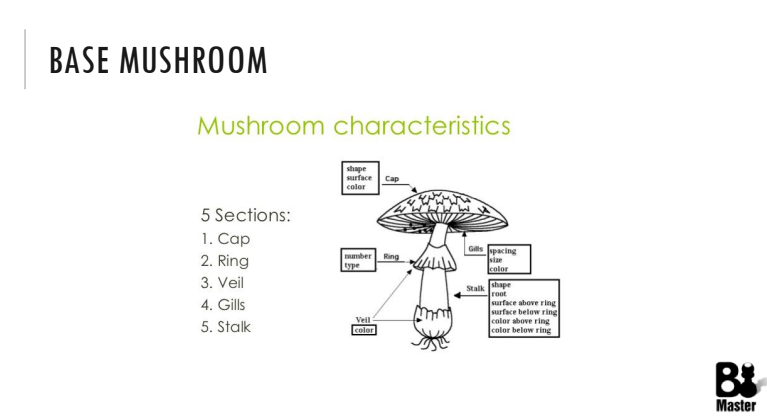

Para termos um resumo estatistico das variáveis numéricas contidas no dataset, basta fazer o describe do mesmo.

In [ ]:
data.describe()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
count,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,...,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936
unique,6,4,8,2,7,2,2,2,9,2,...,4,7,7,2,3,4,6,6,6,2
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,2980,2300,1952,3184,3056,5912,4632,5208,1448,3136,...,3684,3416,3344,5928,5768,3488,2048,2184,2504,3768


##Análise exploratória

É durante a fase de análise exploratória que o cientista de dados começa a ganhar um maior conhecimento sobre o dataset que vai trabalhar. Nessa fase, a utilização de gráficos permite conhecermos melhor as dispersões e correlações das variaveis que vai nos fornecer insights para fazer os pré-processamentos necessários.

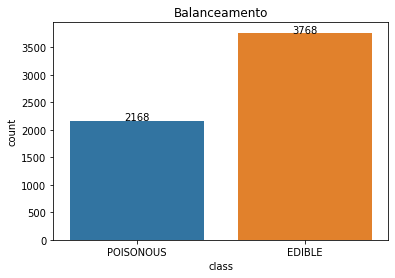

In [ ]:
# Balanceamento
graph = sns.countplot(data=data, x='class')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data['class'].value_counts()).sort_values()[idx], ha="center")

plt.show()

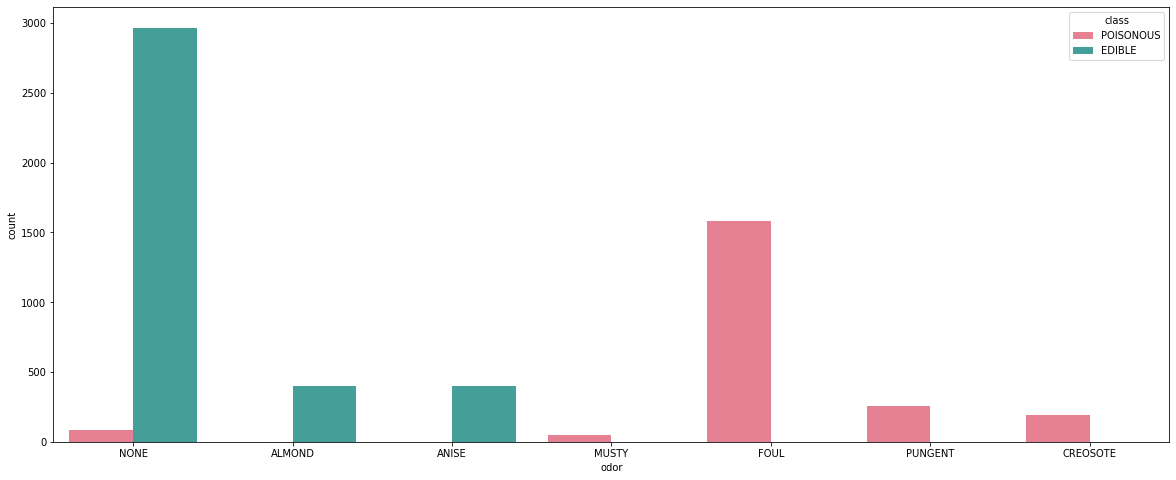

In [ ]:
# Atributo odor
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='odor', hue='class', palette='husl')
plt.show()

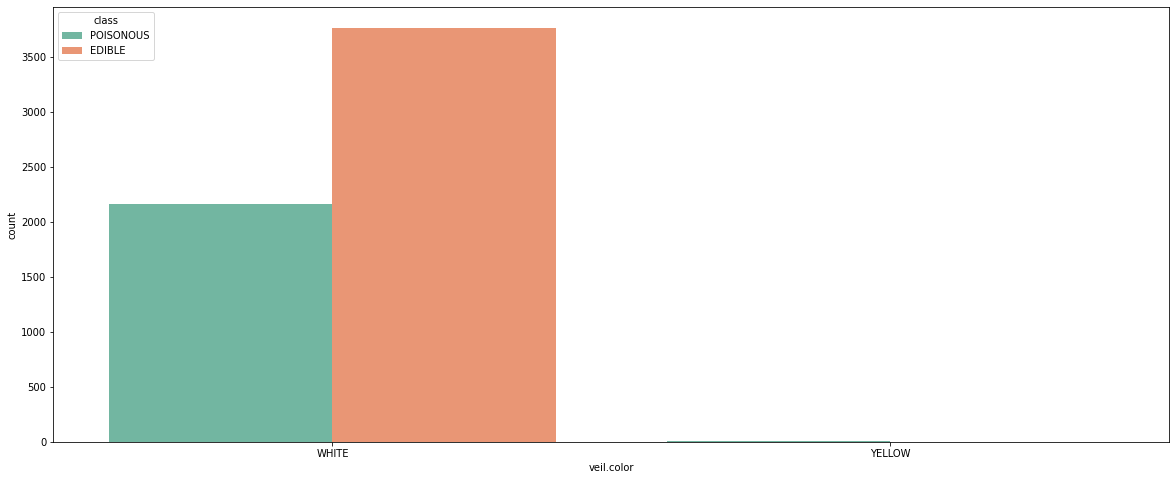

In [ ]:
# Atributo veil.color
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='veil.color', hue='class', palette='Set2')
plt.show()

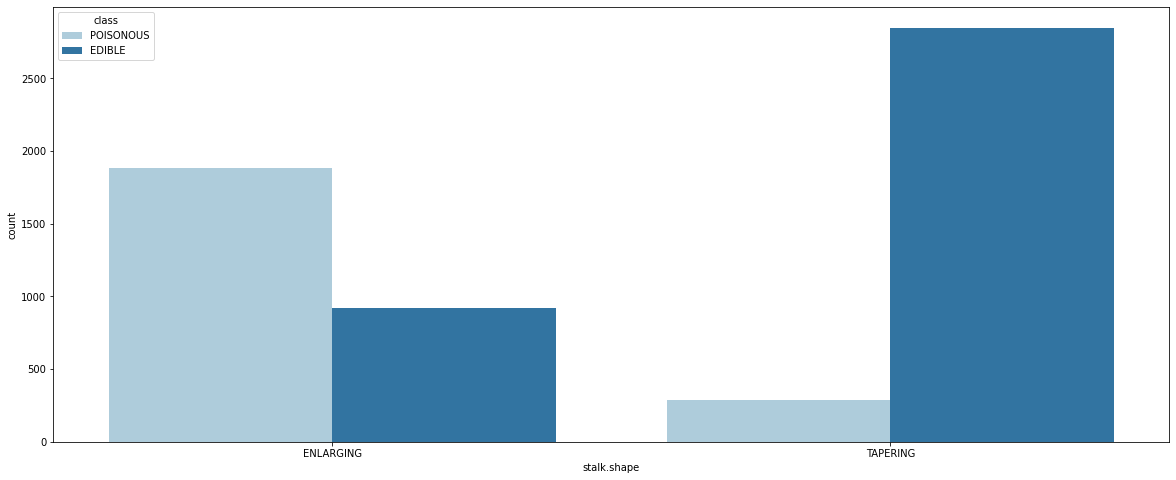

In [ ]:
# Atributo stalk.shape
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='stalk.shape', hue='class', palette='Paired')
plt.show()

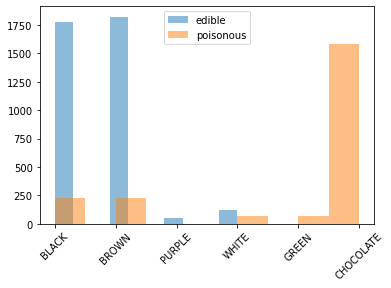

In [ ]:
edible = data[data['class'] == 'EDIBLE']
poisonous = data[data['class'] == 'POISONOUS']

plt.hist(edible['spore.print.color'], alpha=0.5, label='edible')
plt.hist(poisonous['spore.print.color'],  alpha=0.5, label='poisonous')
plt.xticks(rotation=45);
plt.legend()
plt.show()

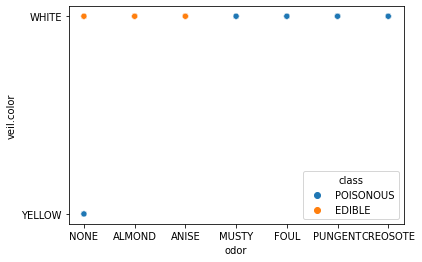

In [ ]:
sns.scatterplot(data=data, x='odor', y='veil.color', hue='class')
plt.show()

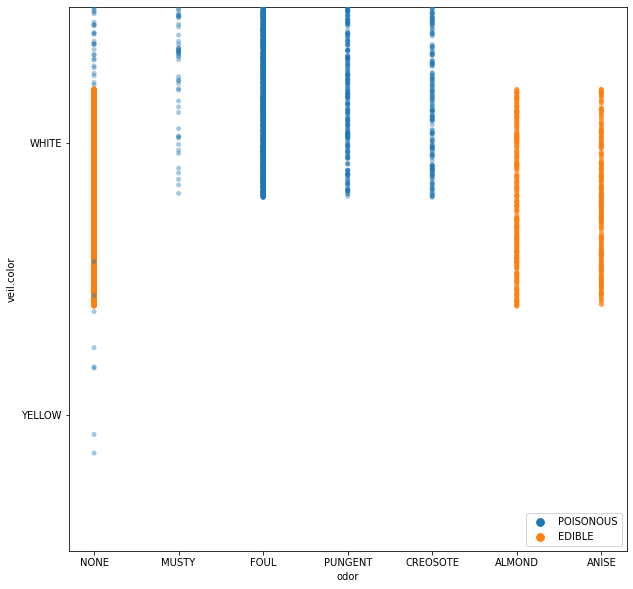

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(data=data, x='odor', y='veil.color', hue='class', jitter=0.8, dodge=True, orient='h', alpha=0.4)

plt.legend(loc='lower right')
plt.show()

##Machine Learning

## Separar bases de treino e teste

Dividir os nossos dados entre base e teste é de extrema importância, uma vez que para avaliar-mos o desempenho de nosso modelo.

Para isso vamos utilizar os dados separados para teste, que são dados que não foram apresentados ao modelo durante o processo de treinamento.

Para esse dataset, vamos utilizar como target a class do cogumelo, e todas as outras colunas serão os atributos.

In [ ]:
# semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'class'], data['class'], test_size=0.2, stratify=data['class'], random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (4748, 21)
shape input de teste:  (1188, 21)
shape output de treino:  (4748,)
shape output de teste:  (1188,)


In [ ]:
# Verificar proporções. amostragem estratificada
data['class'].value_counts()

EDIBLE       3768
POISONOUS    2168
Name: class, dtype: int64

In [ ]:
#treino
print(0.8 * data['class'].value_counts()[0])
print(0.8 * data['class'].value_counts()[1])

#test
print(0.2 * data['class'].value_counts()[0])
print(0.2 * data['class'].value_counts()[1])

3014.4
1734.4
753.6
433.6


In [ ]:
y_train.value_counts()

EDIBLE       3014
POISONOUS    1734
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

EDIBLE       754
POISONOUS    434
Name: class, dtype: int64

## Árvore de Decisão

A árvore de decisão é um modelo que pode ser utilizado em diferentes problemas, como por exemplo classificação (atual), regressão entre outros.

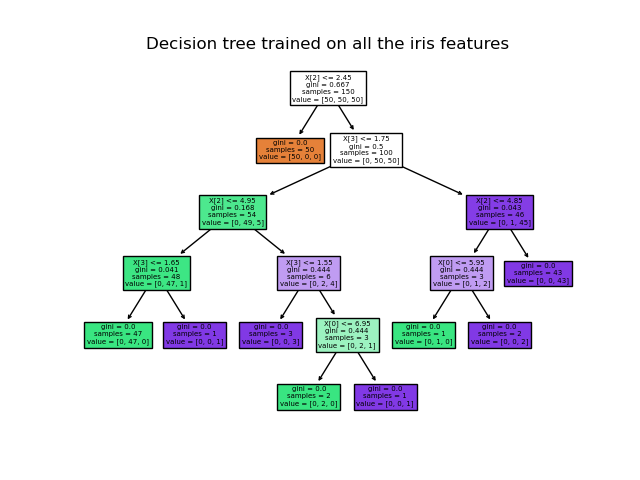

Esse modelo pode ser encontrado dentro do modulo do Sklearn.
Para mais informações acesse: https://scikit-learn.org/stable/modules/tree.html

Como nossa base de dados é formada por colunas do tipo "object", precisamos fazer uma transformção para que o object que até então é um "Texto" vire um número para que o modelo possa compreender, e conseguir ser treinado.

Para isso vamos utilizar o OneHotEncoder, que é uma das possiveis ferramentas para resolver esse problema.

Essa ferramenta, irá mapear os textos conditos em cada coluna e depois irá atribuir um número para cada nome. Essa ferramenta não cria colunas novas para o dataset, ela apenas faz essa técnica de mapeamento. 

Para mais informações acesse: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
# Trasnformar inputs categóricos em numérico: dummy coding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.shape

(4748, 76)

In [ ]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
model.fit(X_train, y_train);

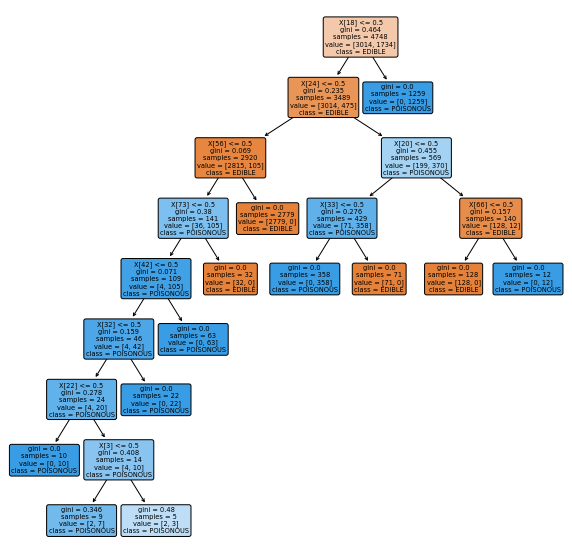

In [ ]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=y_train.unique(), filled=True, rounded=True); # plota a árvore

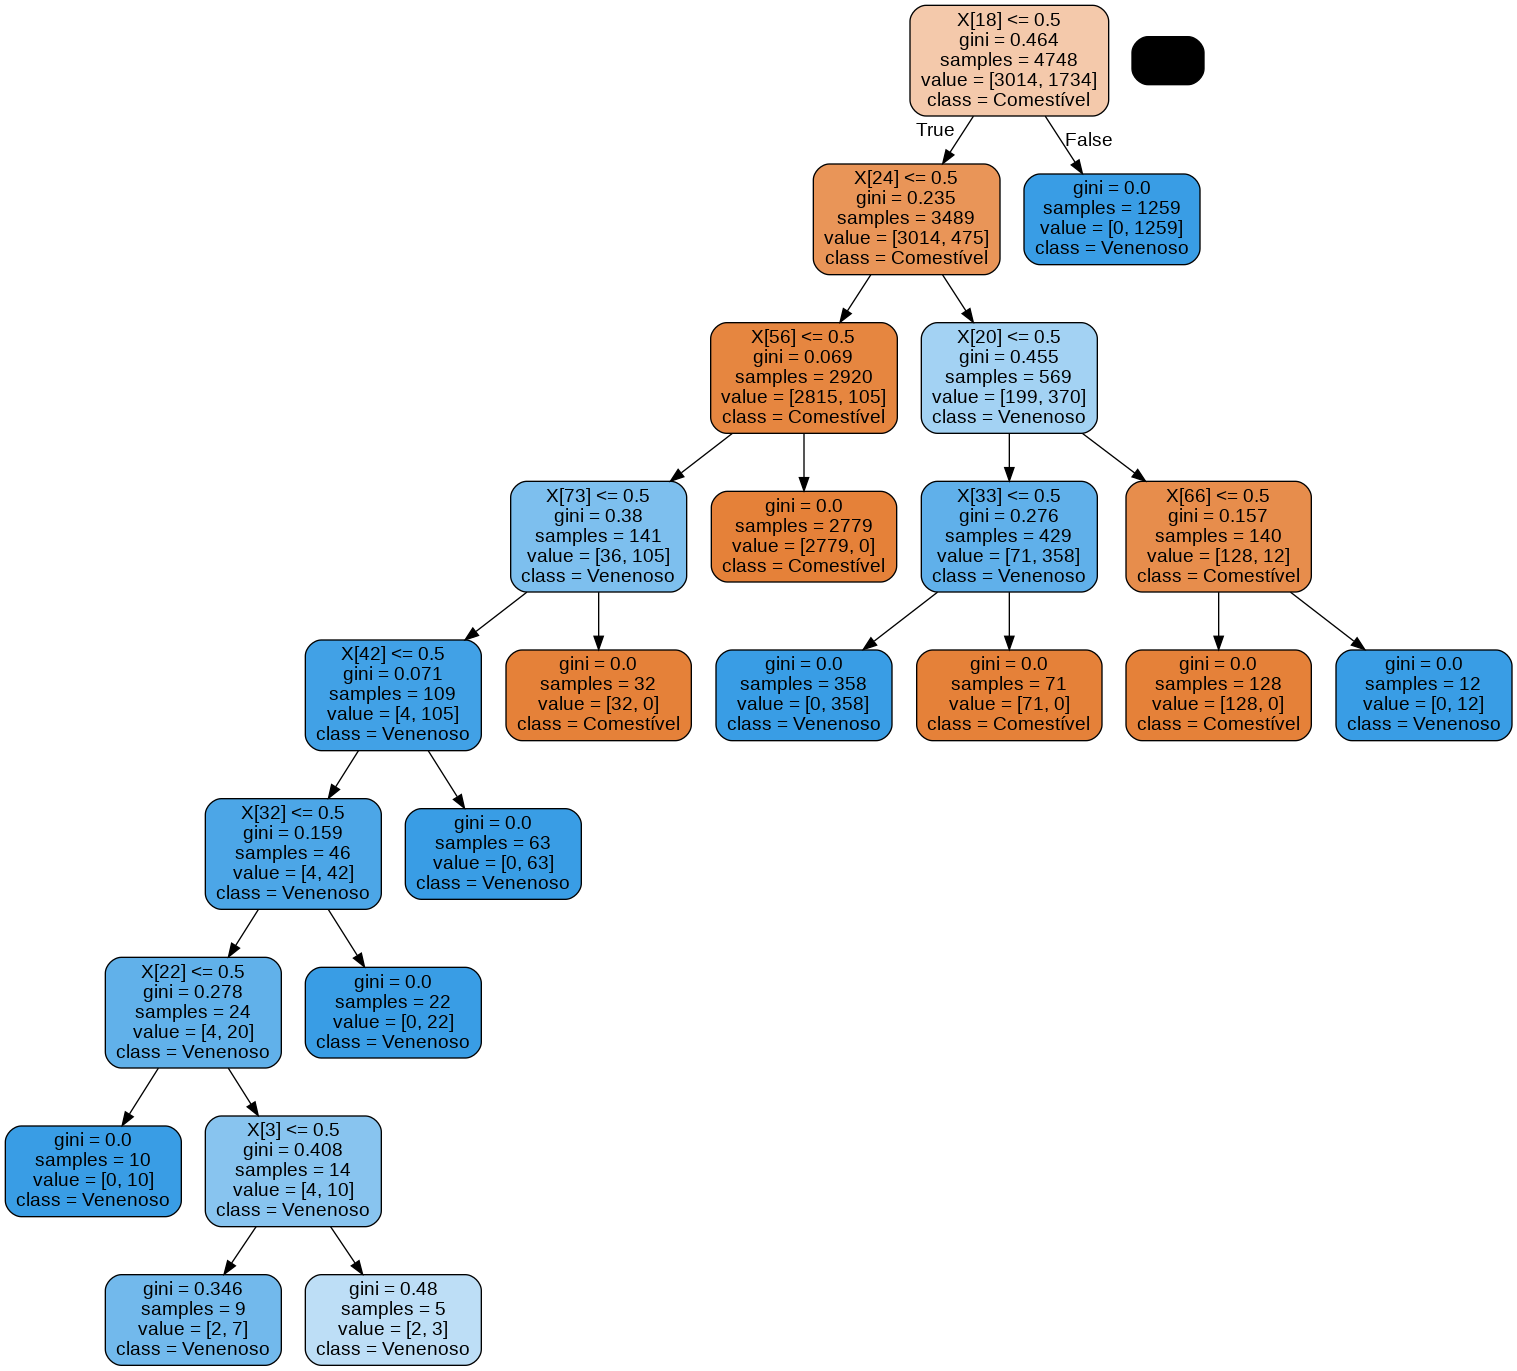

In [ ]:
# OU
# Visualização gráfica da árvore de decisão
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model, #feature_names=list(pd.DataFrame(X_train).columns.values), 
                           class_names=['Comestível', 'Venenoso'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# métrica de treino
model.score(X_train, y_train)

0.9991575400168492

In [ ]:
# Avaliar modelo treinado na base de teste
model.score(X_test, y_test) # acurácia

0.9966329966329966

In [ ]:
y_pred = model.predict(X_test) #inferência do teste

In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequência:")
print(np.asarray((unique_elements, counts_elements)))

Frequência:
[['EDIBLE' 'POISONOUS']
 [754 434]]


In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
pd.DataFrame(confMatrix, index=['Previsto comestível', 'Previsto venenoso'], columns=['Real comestível', 'Real venenoso'])

,Real comestível,Real venenoso
Previsto comestível,750,0
Previsto venenoso,4,434


Analisando a nossa matriz de confusão e tendo noção que o caso mais perigos é o modelo classificar como Comestível um cogumelo que é venenoso, vemos que nosso modelo apresentou um bom resultado.

Para essa base de dados de teste, o modelo não cometeu nenhum erro que poderia levar a condições de intoxicação devido a ingestão de um cogumelo venenoso.

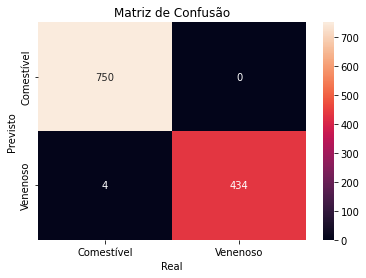

In [ ]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Comestível', 'Venenoso']) 
ax.yaxis.set_ticklabels(['Comestível', 'Venenoso'])
plt.show()